MangoLeafBD Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2  # for image processing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # to show loading progress

# Path to dataset directory
dataset_path = "/content/drive/MyDrive/MangoLeafBD Dataset"

# Define image size (resize for uniformity)
IMG_SIZE = 128  # e.g., 128x128 pixels

# Initialize lists to store data and labels
data = []
labels = []

# Load images and their respective labels
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        for img_file in tqdm(os.listdir(folder_path), desc=f"Loading {folder}"):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                data.append(img)
                labels.append(folder)

# Convert to numpy arrays for easier manipulation
data = np.array(data)
labels = np.array(labels)
print(f"Data shape: {data.shape}, Labels shape: {labels.shape}")

Loading Powdery Mildew: 100%|██████████| 500/500 [00:11<00:00, 45.23it/s] 


Data shape: (4000, 128, 128, 3), Labels shape: (4000,)


<ipython-input-13-cb5cd5eaacb4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_labels, x='class', palette='viridis')


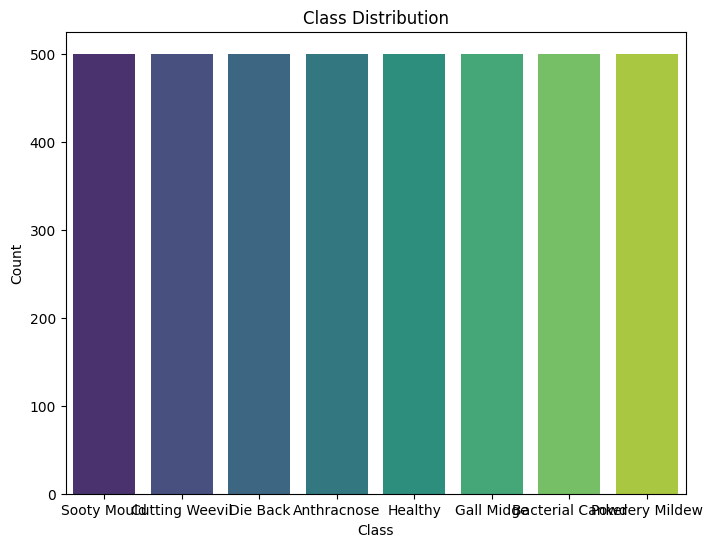

In [13]:
# Convert labels to a DataFrame for easier visualization
df_labels = pd.DataFrame(labels, columns=['class'])
plt.figure(figsize=(8, 6))
sns.countplot(data=df_labels, x='class', palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

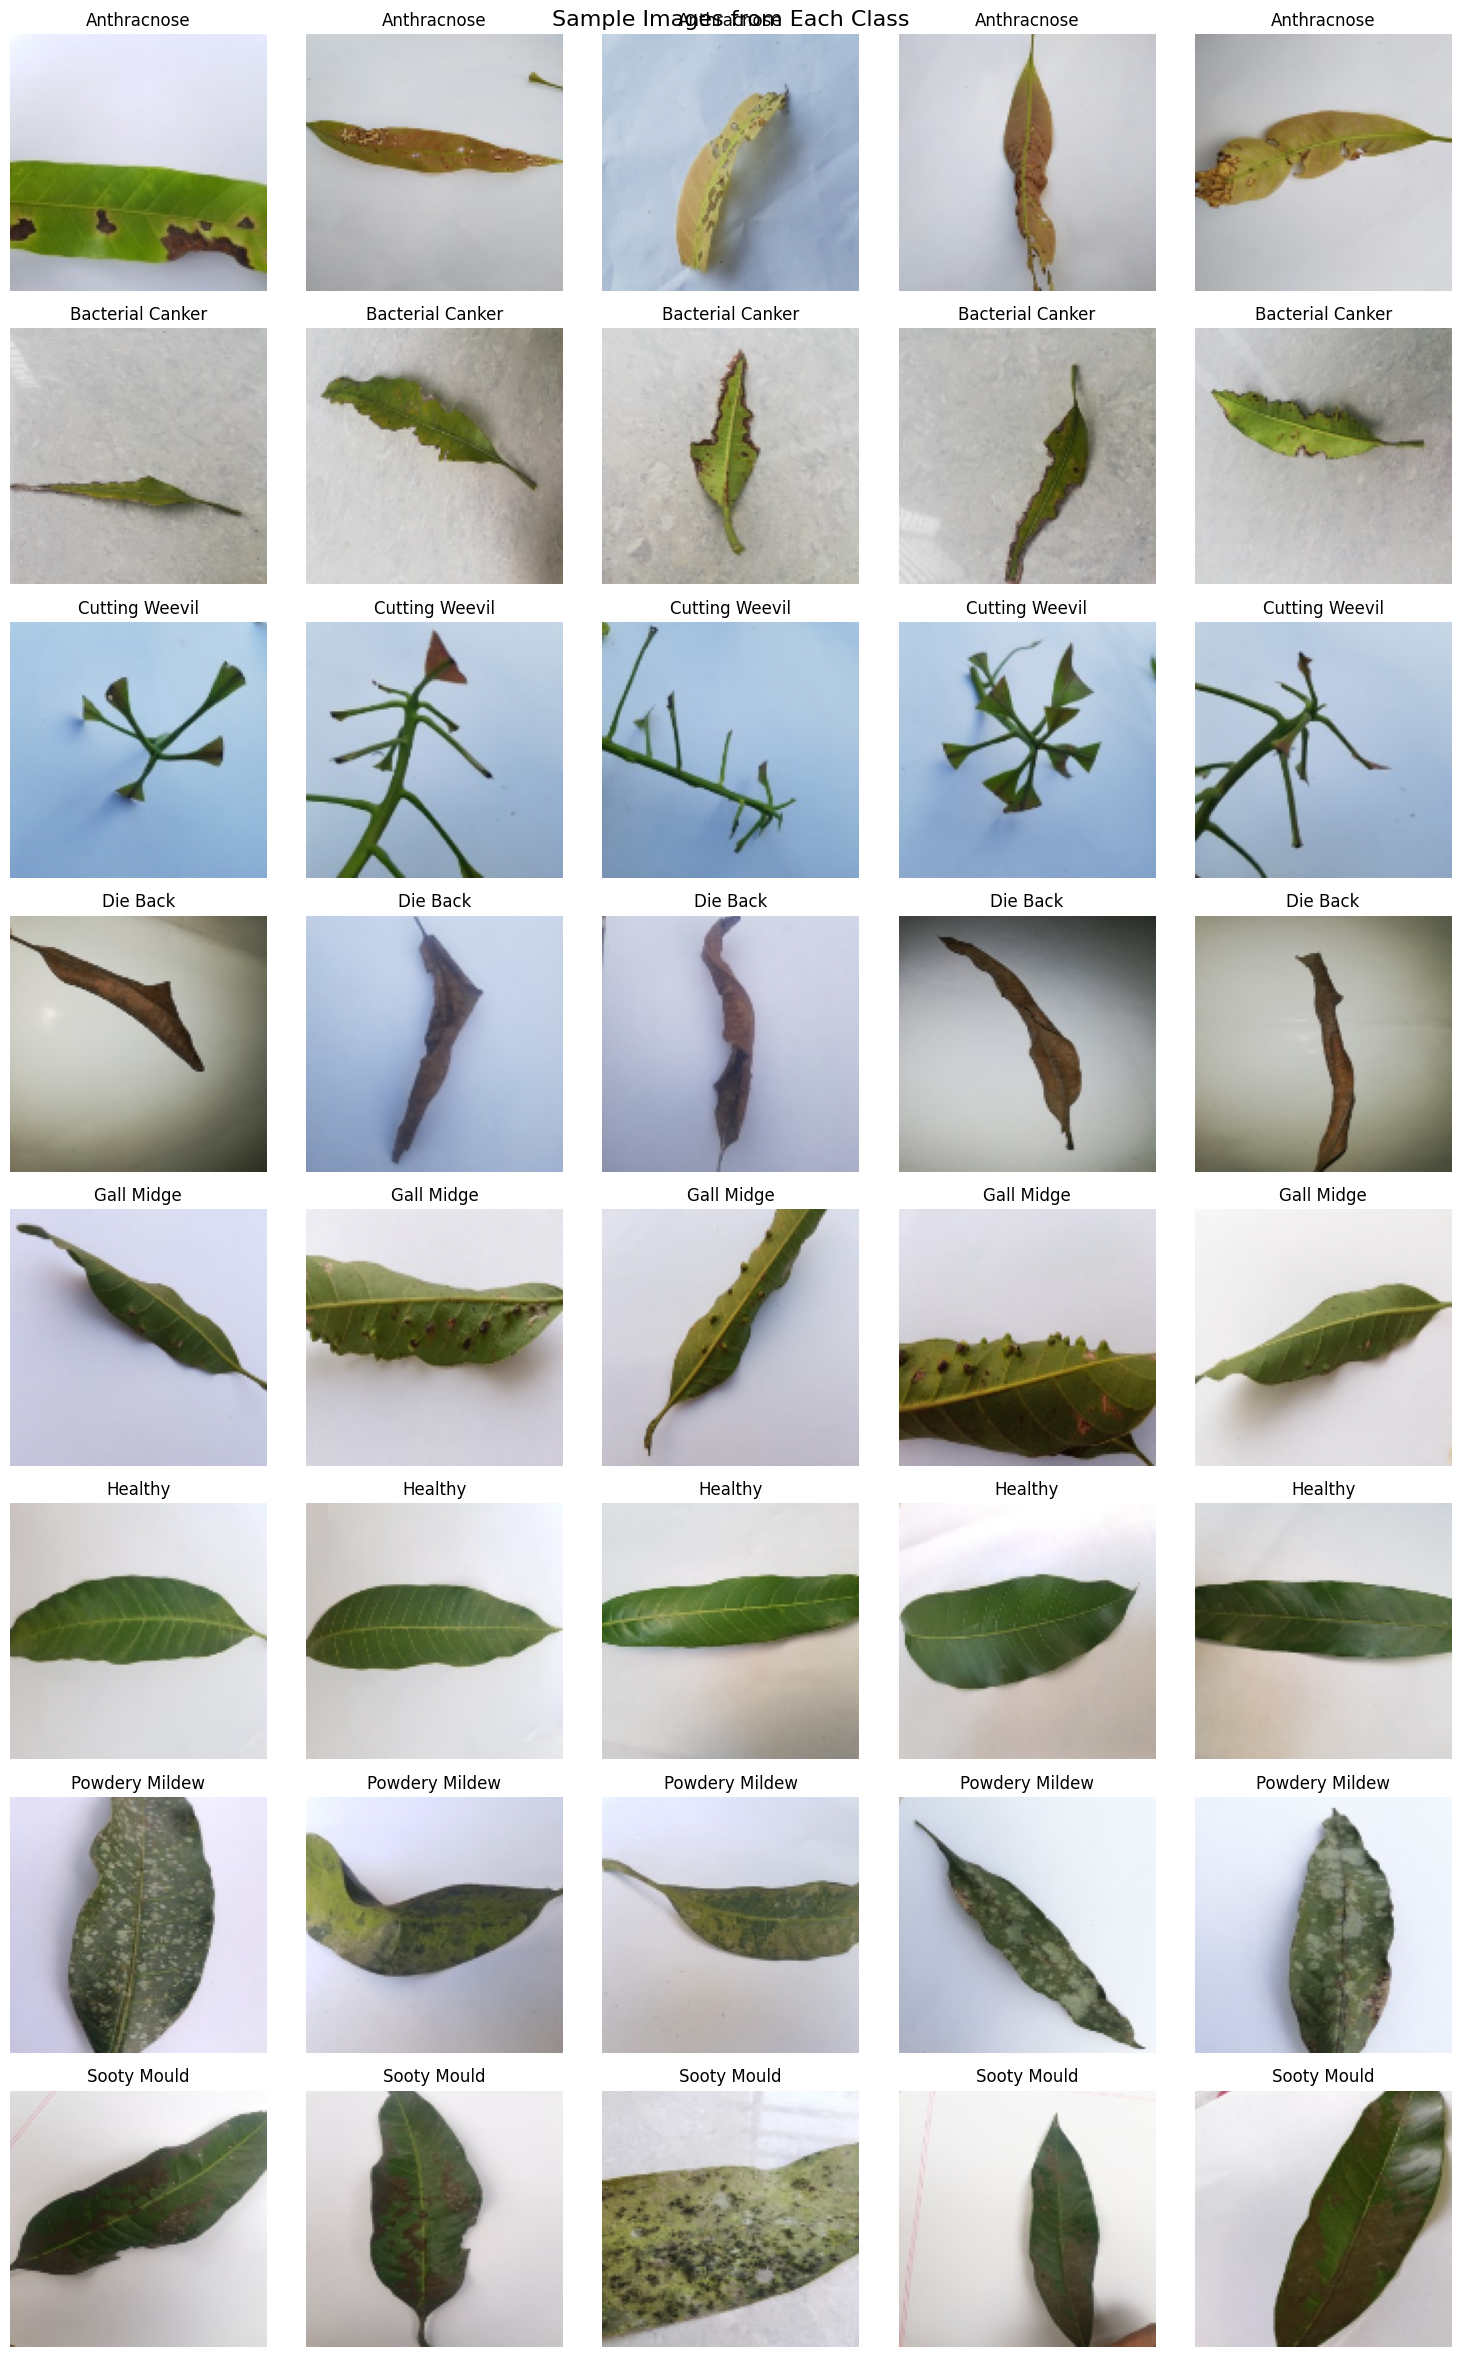

In [4]:
import random
classes = np.unique(labels)
# Displaying 5 random images from each class
fig, ax = plt.subplots(len(classes), 5, figsize=(15, 6 * len(classes) // 2))  # Adjust figsize for more classes
classes = np.unique(labels)
for i, cls in enumerate(classes):
    cls_indices = np.where(labels == cls)[0]
    sample_images = random.sample(list(cls_indices), 5)
    for j, idx in enumerate(sample_images):
        ax[i, j].imshow(cv2.cvtColor(data[idx], cv2.COLOR_BGR2RGB))
        ax[i, j].axis("off")
        ax[i, j].set_title(cls)

plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()  # Adjust subplot spacing
plt.show()

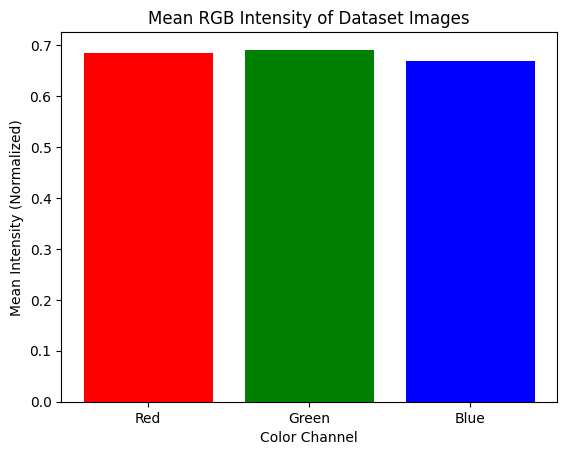

In [5]:
import matplotlib.pyplot as plt

# Flatten data to calculate mean for each RGB channel
mean_rgb = np.mean(data, axis=(0, 1, 2)) / 255  # normalize values
plt.bar(['Red', 'Green', 'Blue'], mean_rgb, color=['red', 'green', 'blue'])
plt.title("Mean RGB Intensity of Dataset Images")
plt.xlabel("Color Channel")
plt.ylabel("Mean Intensity (Normalized)")
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Reshape and normalize data
data_flattened = data.reshape(data.shape[0], -1) / 255.0  # Flatten and normalize
print(f"Flattened Data shape: {data_flattened.shape}")

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_flattened, labels_encoded, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Flattened Data shape: (4000, 49152)
Training set size: (3200, 49152), Test set size: (800, 49152)


Decision Tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       101
           1       0.70      0.69      0.70        91
           2       0.91      0.98      0.94        86
           3       0.81      0.86      0.83       112
           4       0.48      0.56      0.52        90
           5       0.57      0.57      0.57       104
           6       0.56      0.61      0.59        93
           7       0.57      0.45      0.50       123

    accuracy                           0.67       800
   macro avg       0.67      0.68      0.67       800
weighted avg       0.67      0.67      0.66       800

Decision Tree Accuracy: 0.6675


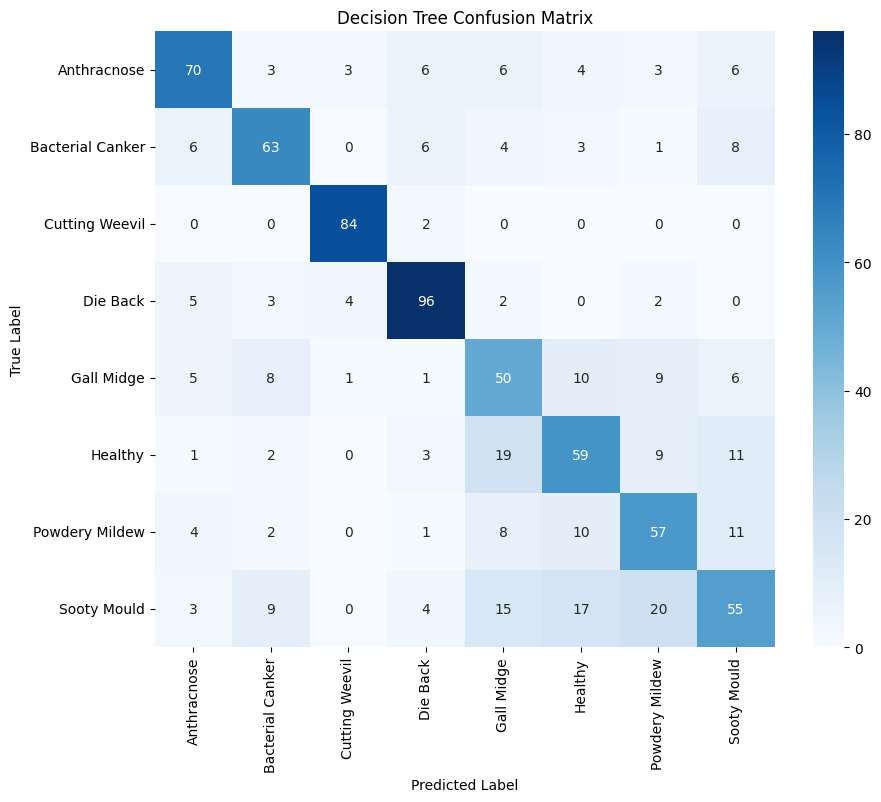

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Random forest

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       101
           1       0.86      0.90      0.88        91
           2       0.96      1.00      0.98        86
           3       0.97      0.94      0.95       112
           4       0.77      0.86      0.81        90
           5       0.89      0.87      0.88       104
           6       0.90      0.85      0.87        93
           7       0.88      0.80      0.84       123

    accuracy                           0.89       800
   macro avg       0.89      0.90      0.89       800
weighted avg       0.89      0.89      0.89       800

Random Forest Accuracy: 0.8925


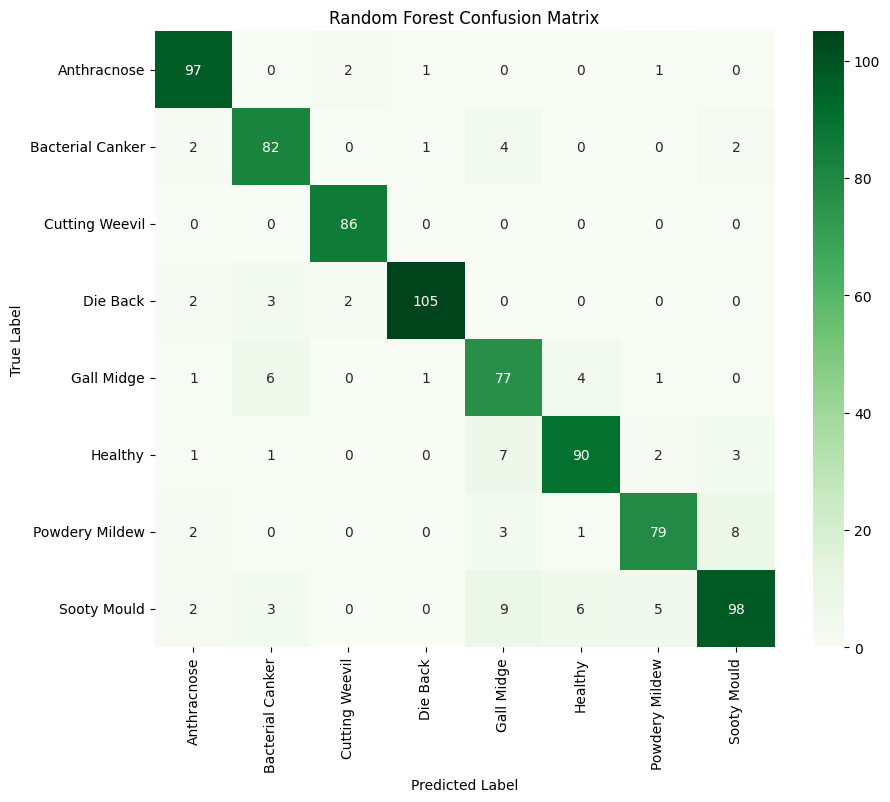

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<ipython-input-12-48ddddd6ee97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')


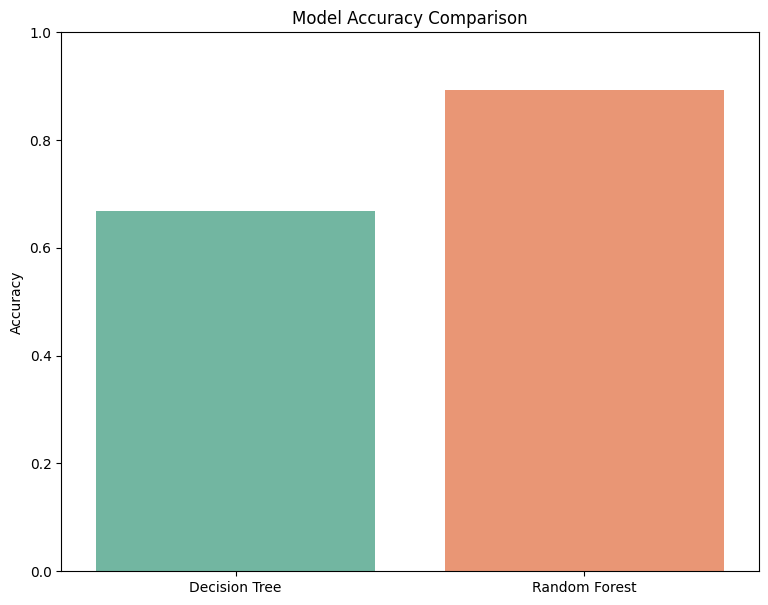

In [12]:
# Comparing accuracy scores
models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(9, 7))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
plt.show()